In [1]:
# Downloading Dataset

!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:25<00:00, 123MB/s]
100% 1.98G/1.98G [00:25<00:00, 82.9MB/s]


In [2]:
# Unzipping Data Set

import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [13]:
# Importing TensorFlow and Keras Libraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [7]:
# Loading and Preparing Training Dataset from Directory Using Keras

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 3115 files belonging to 36 classes.


In [11]:
# Loading and Preparing Validation Dataset from Directory Using Keras

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 359 files belonging to 36 classes.


In [16]:
#  Building a Convolutional Neural Network (CNN) Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [17]:
#  Displaying the Model Architecture Summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_2 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
# Compiling the Model with Optimizer, Loss Function, and Metrics

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#  Training the Model with Training and Validation Data

history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
98/98 [==============================] - 84s 715ms/step - loss: -9606424.0000 - accuracy: 0.0241 - val_loss: -28667006.0000 - val_accuracy: 0.0251
Epoch 2/10
98/98 [==============================] - 69s 665ms/step - loss: -262212528.0000 - accuracy: 0.0241 - val_loss: -687060608.0000 - val_accuracy: 0.0251
Epoch 3/10
98/98 [==============================] - 72s 705ms/step - loss: -1772449536.0000 - accuracy: 0.0241 - val_loss: -3717925888.0000 - val_accuracy: 0.0251
Epoch 4/10
98/98 [==============================] - 69s 671ms/step - loss: -6637041152.0000 - accuracy: 0.0241 - val_loss: -9211774976.0000 - val_accuracy: 0.0251
Epoch 5/10
98/98 [==============================] - 68s 656ms/step - loss: -17774391296.0000 - accuracy: 0.0241 - val_loss: -31535554560.0000 - val_accuracy: 0.0251
Epoch 6/10
98/98 [==============================] - 71s 680ms/step - loss: -39183941632.0000 - accuracy: 0.0241 - val_loss: -48830873600.0000 - val_accuracy: 0.0251
Epoch 7/10
98/98 [=======

In [24]:
# Importing Libraries

import cv2
import matplotlib.pyplot as plt


In [23]:
# Uploading test image

test_img=cv2.imread('/content/fruit.jpeg')

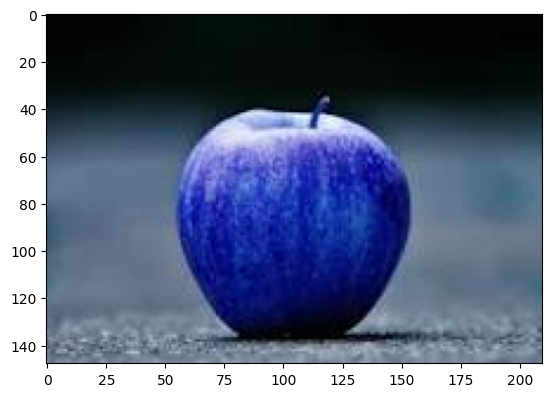

In [26]:
plt.imshow(test_img)

In [27]:
test_img.shape

(148, 210, 3)

In [28]:
# Resizing the test image for prediction purpose
test_img=cv2.resize(test_img,(256,256))

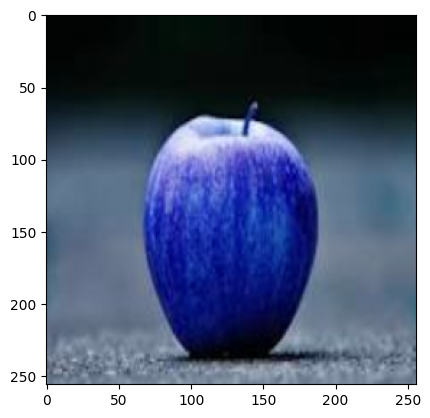

In [29]:
plt.imshow(test_img)

In [30]:
test_input=test_img.reshape(1,256,256,3)

In [31]:
# Making Predictions on Test Input Using the Trained Model

model.predict(test_input)

1/1 [==============================] - 1s 659ms/step


array([[1.]], dtype=float32)

In [32]:
# Prediction process for vegetable (Uploading)

test_img1=cv2.imread('/content/vegetable.jpg')

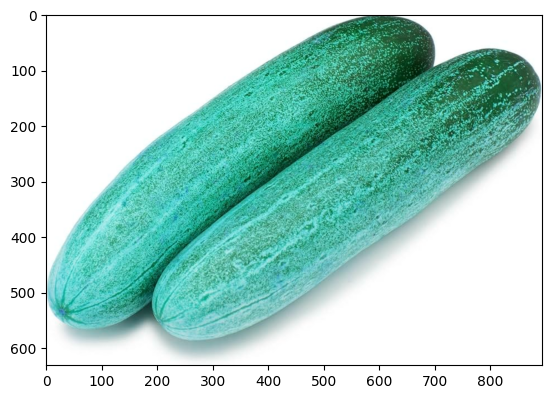

In [33]:
plt.imshow(test_img1)

In [34]:
test_img1.shape

(631, 894, 3)

In [35]:
test_img1=cv2.resize(test_img,(256,256))

In [36]:
test_input1=test_img1.reshape(1,256,256,3)

In [37]:
# Making Predictions on Test Input Using the Trained Model

model.predict(test_input1)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)